# The MOOC Wars: Kaggle's Perspective

Many of us come to Kaggle to learn. Weather it's through competitions, studying other's code, or reading the discussion threads to get inspired - all in a single, community-driven platform. Yet, this is not where our learning journey typically begins. We start in either college/university classes or online courses on data science and machine learning. It will be instructive to look at the latter style of study in the context of data science students and professinoals.
 
 <img src="https://i.imgur.com/yxazDyP.png" align='right'>
<span style="background-color: #EFFBEF; height: 50%;">Massive Open Online Courses</span> (MOOC) have taken the world of learning by storm earlier this decade. No more does one have to be physically present at a brick and mortar institution to learn the subjects of statistics, computer science, and business. World class educators and leading researches are now delivered to your home through the magic of Internet. For free, a small fee, and sometimes heafty sums of $, some platforms even gave you a promise of gainful employment at the end of their certification program [1]. 

The first MOOC that went "viral", so to speak, was actually one on artificial intelligence [2]. Data Sciene/ML along with programming remain some of the most popular courses on these platforms. So, it should come as no surprise that on average <span style="background-color: #EFFBEF; height: 50%;">Kagglers spend   25% of their learning time engaged with sites like</span> [Coursera](https://www.coursera.org/), [Udacity](https://www.udacity.com), [edX](https://www.edx.org/), and even Kaggle's very own [Kaggle Learn](https://www.kaggle.com/learn/overview). 

Averages, as we know, do not tell a rich story. What does the Kaggle community think about MOOC education? Which learning platforms excel at attracting and keeping DS/ML students? How do the platforms stack up against each other? To answer these question, this notebook will explore a subset of 2018 Kaggle Survey Respondents who participate in Massive Open Online Courses (MOOC).

## What Kagglers think of MOOC?
Kaggle ML & DS survey asked a very interesting question (#39): 
> _How do you perceive the quality of online learning platforms [MOOCs] as compared to the quality of the education provided by traditional brick and mortar institutions?_

To answer this, a respondent did not have to have ever used a learning platform - only having an opinon was required, though an option of "No opinion; I do not know" was also available. In the end, a <span style="background-color: #EFFBEF; height: 50%;">little over 60% of survey participants shared their attitude on the matter</span>. The distribution of answers tells a different story accross education and country of residence segments.

_Note_: Before diving in, I preprocess the complete dataset in order to simplify analysis and make data visualization look better: convert range values to be ordinal, shorten some long category names, rename columns, and convert strings to numeric where appropriate.

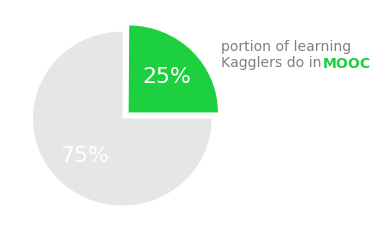

In [1]:
### IMPORT LIBRARIES AND DATA ###
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Special setting for matplotlib to play nice with Jupyter
%matplotlib inline

# Read in the data
dat = pd.read_csv('../input/multipleChoiceResponses.csv', dtype='object')

### START OF DATA PREP ###
# Initial Data Preprocessing to make visualizations nicer
# Drop first row with question text
dat.drop(dat.index[0], inplace=True)

# Collapse undergrad category
dat['Q4'] = dat['Q4'].apply(lambda x: x if x != 'Some college/university study without earning a bachelor’s degree' else 'Bachelor’s degree')
# Shorten some country names
dat['Q3'] = dat['Q3'].apply(lambda x: x if x != 'United States of America' else 'USA')  
dat['Q3'] = dat['Q3'].apply(lambda x: x if x != 'United Kingdom of Great Britain and Northern Ireland' else 'UK')  

# Set categorical variables to be ordinal
dat['Age'] = dat['Q2'].astype('category').cat.as_ordered()                  # Age range
dat['Role_Experience'] = dat['Q8'].astype('category').cat.as_ordered()       # Experience in current role
dat['Coding%'] = dat['Q23'].astype('category').cat.as_ordered()              # Percentage of time coding
dat['Data_Experience'] = dat['Q24'].astype('category').cat.as_ordered()      # Years of experience with data analysis
dat['ML_Experience'] = dat['Q25'].astype('category').cat.as_ordered()       # Years of experience with machine learning 
dat['Bias_Exploration'] = dat['Q43'].astype('category').cat.as_ordered()    # Percentage of projects where model bias is explored
dat['Insight_Exploration'] = dat['Q46'].astype('category').cat.as_ordered()   # Percentage of projects where model insights are explored

# Rename columns
dat['Gender'] = dat['Q1']
dat['Country'] = dat['Q3']

# Convert numeric to float for easier manipulation and meaningful names
dat['Gather Data'] = dat['Q34_Part_1'].astype(float)
dat['Clean Data'] = dat['Q34_Part_2'].astype(float)
dat['Visualize Data'] = dat['Q34_Part_3'].astype(float)
dat['Model Build/Select'] = dat['Q34_Part_4'].astype(float)
dat['Deploy to Prod'] = dat['Q34_Part_5'].astype(float)
dat['Find Insights'] = dat['Q34_Part_6'].astype(float)
dat['Other Time'] = dat['Q34_OTHER_TEXT'].astype(float)

dat['MOOC_Time'] = dat['Q35_Part_2'].astype(float)


#### END OF DATA PREP ####


# Setup data for pie chart
mooc_use = dat['MOOC_Time'].describe()[1]
labels = ['Online Learning', 'Other Learning']
colors = ['#1DD040', '#E6E6E6']
explode = [0.1, 0]
sizes = [mooc_use, 100 - mooc_use]

# Plot pie chart
fig1, ax1 = plt.subplots(figsize=(4,4))
plt.pie(sizes, colors=colors, explode=explode, autopct='%1.0f%%',\
        textprops={'color': 'white', 'fontsize': 22});

# Add text
plt.text(1.1, 0.6, 'portion of learning\nKagglers do in', fontsize=14, color='grey')
plt.text(2.25, 0.59, 'MOOC', fontsize=14, color='#1DD040', fontweight='bold');

### Kagglers generally favour online learning...
Overall, Kagglers seem to have a favourable view of MOOCs such as those found on platforms like Courseara, Udemy, or DataCamp. From close to 16,000 responses to question 39, I've excluded 1,564 that do not have an opinion on the matter. <span style="background-color: #EFFBEF; height: 50%;">Close to 60% of remaining respondendents believe MOOCs are better than traditional eduction</span>, while 16% think they are worse. The sample is of course biased. After all we are asking people who actively engage with an online community - Kaggle.

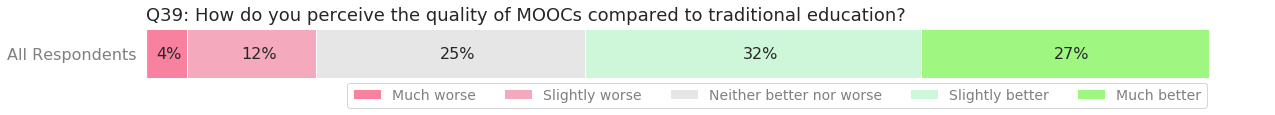

In [2]:
# Aggregate Kaggler's opinions on MOOC
cnts = dat['Q39_Part_1'].value_counts()
no_opinion = cnts['No opinion; I do not know']
cnts = cnts.drop(labels = ['No opinion; I do not know'])
cnts = cnts/cnts.sum()    # convert to percentage


# Plot
# Set order and colors
sns.set()
pref_order = ['Much worse', 'Slightly worse', 'Neither better nor worse', 'Slightly better', 'Much better']
pref_color = ['#F7819F', '#F5A9BC', '#E6E6E6', '#CEF6D8', '#9FF781']

# matplotlib general settings
fig, ax = plt.subplots(figsize=(20,1))
plt.title('Q39: How do you perceive the quality of MOOCs compared to traditional education?', fontsize=18, loc='left')
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', labelsize=16, labelcolor='grey')  
ax.set_facecolor('white')

# Draw each bar and text separately with appropriate offset
bar_start = 0
for i in pref_order:
    ax.barh(y=['All Respondents'], width=cnts[i], height=0.1, left=bar_start, color=pref_color[pref_order.index(i)])
    plt.text(bar_start + cnts[i]/2 - 0.01, -0.01, "{:.0%}".format(cnts[i]), fontsize=16)
    #plt.text(bar_start + (cnts[i])/2 - 0.015, 0.4, "{:.0%}".format(cnts[i]), fontsize=16, transform=ax.transAxes)
    bar_start += cnts[i]

# Draw legend and set color of its text
leg = ax.legend(pref_order, loc=(0.18,-0.5), ncol=5, fontsize=14, frameon=True, facecolor='white');
for txt in leg.get_texts():
    plt.setp(txt, color='grey')


### ... but higher education means higher expectations
The sentiment around MOOCs is not uniform accross various levels of higher eduction. Respondents who have attained Bacherlor's degrees are much more enthusiastic (66% rank better, 12% rank worse) about MOOCs than those who put in more years of study to attain a Doctoral degree (48% rank better, 23% rank worse). This makes sense if we consider the advanced classes and rigorous research supervision that is seldom, if ever, found in online learning platforms. MOOC has other shortcommings as well, such as lack of student engagement in class discussion, low completion rates, and lack of feedback [3]. <span style="background-color: #EFFBEF; height: 50%;">As it stands, online learning can be seen as augmenting education, not replacing it</span>. The milage varies, by country though.

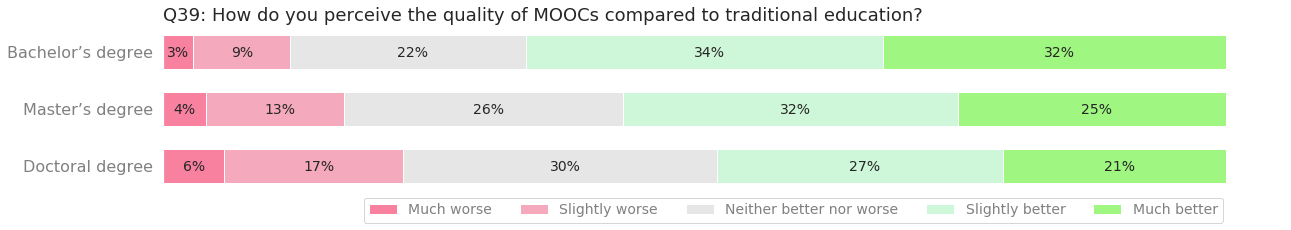

In [3]:
# Categories are age brackets from lowest to highest
categories = ['Doctoral degree', 'Master’s degree', 'Bachelor’s degree']

# Empty df to be built out
cnts = pd.DataFrame(columns = categories)

# Loop over all age categories and get distribution of responses 
for cat in categories:
    cnts[cat] = dat.loc[dat['Q4'] == cat, 'Q39_Part_1'].value_counts()

# Drop those with no opinion
cnts = cnts.drop('No opinion; I do not know')
cnts = cnts/cnts.sum()    # convert to percentage


# Plot

# matplotlib settings
fig, ax = plt.subplots(figsize=(20,3))
plt.title('Q39: How do you perceive the quality of MOOCs compared to traditional education?', fontsize=18, loc='left')
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', labelsize=16, labelcolor='grey')  
ax.set_facecolor('white')

# Draw each bar and text separately with appropriate offset
for cat in categories:
    bar_start = 0
    for i in pref_order:
        ax.barh(y=[cat], width=cnts.loc[i,cat], height=0.6, left=bar_start, color=pref_color[pref_order.index(i)])
        plt.text(bar_start + cnts.loc[i,cat]/2 - 0.01, categories.index(cat) - 0.1, "{:.0%}".format(cnts.loc[i,cat]), fontsize=14)
        bar_start += cnts.loc[i,cat]

# Draw legend and set color of its text
leg = ax.legend(pref_order, loc=(0.18,-0.2), ncol=5, fontsize=14, frameon=True, facecolor='white');
for txt in leg.get_texts():
    plt.setp(txt, color='grey')

### USA disillusioned with MOOC, while India is in love
Looking at the top three countries, based on number of responses, I noticed something surprising. One would imagine USA, where millionaires who dropped out of college are hailed as role models and where the cost of higher education (and student debt) is evergrowing, would see online courses very favourably. However, <span style="background-color: #EFFBEF; height: 50%;">American respondents ranked MOOCs worst vs traditional education when compared to other countries</span>. 

Respondents from India and China, on the other hand, seem to embrace online learning with open arms. Almost 80% of Indian respondents, for example, see online learning as better than brick and mortal institutions. Since the MOOC content is largely the same between countries, it stands to reason that <span style="background-color: #EFFBEF; height: 50%;">the difference in opinion is due to quality of traditional education or access to that education</span>. There is evidence to support this, and the MIT Technology Review [4] put it best, I think:
> In a country [India] of rigid teaching styles and scarce university slots, students and professors are exploring what online learning can be.

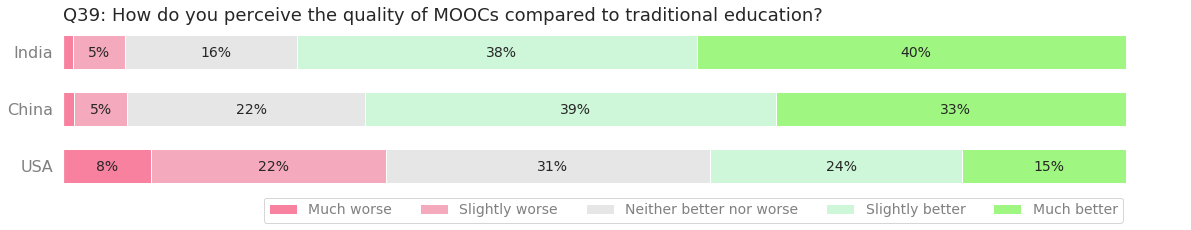

In [4]:
# Categories are top 3 countries based on number of responses
categories = ['USA', 'China', 'India']

# Empty df to be built out
cnts = pd.DataFrame(columns = categories)

# Loop over all age categories and get distribution of responses 
for cat in categories:
    cnts[cat] = dat.loc[dat['Country'] == cat, 'Q39_Part_1'].value_counts()

# Drop those with no opinion
cnts = cnts.drop('No opinion; I do not know')
cnts = cnts/cnts.sum()    # convert to percentage


# Plot

# matplotlib settings
fig, ax = plt.subplots(figsize=(20,3))
plt.title('Q39: How do you perceive the quality of MOOCs compared to traditional education?', fontsize=18, loc='left')
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', labelsize=16, labelcolor='grey')  
ax.set_facecolor('white')

# Draw each bar and text separately with appropriate offset
for cat in categories:
    bar_start = 0
    for i in pref_order:
        ax.barh(y=[cat], width=cnts.loc[i,cat], height=0.6, left=bar_start, color=pref_color[pref_order.index(i)])
        if cnts.loc[i,cat] > 0.02:
            plt.text(bar_start + cnts.loc[i,cat]/2 - 0.01, categories.index(cat) - 0.1, "{:.0%}".format(cnts.loc[i,cat]), fontsize=14)
        bar_start += cnts.loc[i,cat]

# Draw legend and set color of its text
leg = ax.legend(pref_order, loc=(0.18,-0.2), ncol=5, fontsize=14, frameon=True, facecolor='white');
for txt in leg.get_texts():
    plt.setp(txt, color='grey')

# Which MOOC platforms are winning?

Here it is useful to define two groups of respondents: one that uses a single MOOC platform (n=5,992) and one that engage with multiple platforms (n=9,679). 

### Single-platform learners often choose Coursera as their sole study
Among single-platform users, Coursera ranks number one, followed by Kaggle's very own learning resource. Koodos to Kaggle for holding their own in a fairly competitive MOOC environment. It's even more impressive given that Kaggle Learn is an ancillary to the core service offering of the data science competition platform. Of course, the sample in the survey is heavily biased toward Kaggle users. Udemy and DataCamp are not far behind Kaggle Learn when it comes to single-platform learners. The takeaway is <span style="background-color: #EFFBEF; height: 50%;">these 4 MOOCs have enough appeal for Kagglers to stick with them exclusively</span> and to not go looking for greener pastures... at least for some time. 

> _Note_: the "Other" category in question 36 responses will be explored separately in the appendix of this Kernel, if you are interested to know what other learning platforms your peers use.

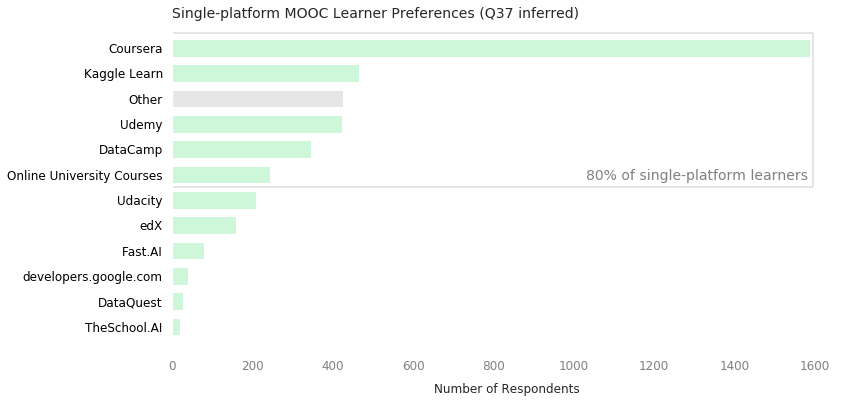

In [5]:
# TECHNICAL NOTE: if a respondent only provided one answer in question 36 (which online learning platforms do you use), 
#                 then question 37 was skipped. It is assumed that the one platform from Q36 is the platform on which 
#                 the respondent spends most time. To take that into account I do some data prep before plottign the graph.

# Iterate over a slise of dataset (questions 36, all parts)
for i, row in dat.iloc[:,291:304].iterrows():
    if row['Q36_Part_12'] == 'None':
        dat.loc[i, 'Q37'] = 'None'                       # Responded doesn't use MOOCs
    elif row.count() == 1:
        dat.loc[i, 'Q37'] = ''.join(row.fillna(''))      # Respondent gave only one MOOC

## Count how many MOOC platforms the respondent uses
dat['No_MOOCs'] = dat.iloc[:,291:304].count(axis=1)

# Plot

# Get the counts of each MOOC
cnts = dat.loc[dat['No_MOOCs'] == 1, 'Q37'].value_counts()
cnts = cnts.drop(['None'])

# Assign different color to 'Other' category
plt_data = pd.DataFrame(cnts)
plt_data['hue'] = ['#CEF6D8'] * plt_data.shape[0]
plt_data.loc['Other', 'hue'] = '#E6E6E6'


# Basic plot setting
fig, ax = plt.subplots(figsize=(12,6))
ax.set_facecolor('white')
plt.barh(y=plt_data.index, width=plt_data.Q37, height=0.7, color=plt_data.hue)
plt.title('Single-platform MOOC Learner Preferences (Q37 inferred)', fontsize=14, loc='left')


# Remove figure frame and Y grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)


# X-axis formatting
plt.xlabel('Number of Respondents', labelpad = 10)
ax.tick_params(axis='x', colors='grey', labelsize=12)

# Y-axis formatting
ax.yaxis.grid(False)
ax.tick_params(axis='y', colors='black', labelsize=12)

# Plot from highest to lowest count
plt.gca().invert_yaxis()

# Draw callout box
rect = patches.Rectangle((0,-0.6),1595,6.08,linewidth=0.4,edgecolor='grey',facecolor='none')
plt.text(1030, 5.2, '80% of single-platform learners', fontsize=14, color='grey')
ax.add_patch(rect);

### ... and so do multi-platform learners
Among respondents who use multiple MOOC platforms, Coursera holds the highest mindshare. <span style="background-color: #EFFBEF; height: 50%;">Coursera is where 3,748 Kagglers spend most of their online learning time</span>. DataCamp and Udemy share second place, with roughly equal number of respondents choosing them. Udacity in fourth place, edX in fifth, while Kaggle Learn dropped all the way to #6 spot. To me this suggests that once a learner discovers other MOOC platforms, Kaggle Learn can rarely compete. Still, an impressive performace for a completely free resource. 

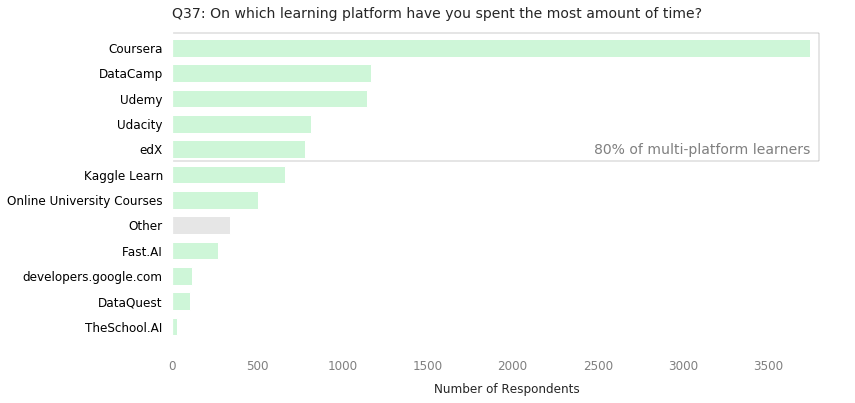

In [6]:
# Plot

# Get the counts of each MOOC
cnts = dat.loc[dat['No_MOOCs'] > 1, 'Q37'].value_counts()

# Assign different color to 'Other' category
plt_data = pd.DataFrame(cnts)
plt_data['hue'] = ['#CEF6D8'] * plt_data.shape[0]
plt_data.loc['Other', 'hue'] = '#E6E6E6'


# Basic plot setting
fig, ax = plt.subplots(figsize=(12,6))
ax.set_facecolor('white')
plt.barh(y=plt_data.index, width=plt_data.Q37, height=0.7, color=plt_data.hue)
plt.title('Q37: On which learning platform have you spent the most amount of time?', fontsize=14, loc='left')


# Remove figure frame and Y grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)


# X-axis formatting
plt.xlabel('Number of Respondents', labelpad = 10)
ax.tick_params(axis='x', colors='grey', labelsize=12)

# Y-axis formatting
ax.yaxis.grid(False)
ax.tick_params(axis='y', colors='black', labelsize=12)

# Plot from highest to lowest count
plt.gca().invert_yaxis()

# Draw callout box
rect = patches.Rectangle((0,-0.6),3800,5.08,linewidth=0.4,edgecolor='grey',facecolor='none')
plt.text(2480, 4.2, '80% of multi-platform learners', fontsize=14, color='grey')
ax.add_patch(rect);

Does this mean Coursera is three times better than its closest rivals? Not exactly, but we can quantify the comparison better by pitting the MOOCs against one another, one pair at a time. Looking at respondents who use Coursera along with another platform (e.g. DataCamp) and using question 37 (which platform do you use the most?) as a proxy for users preference among platforms, I can see what percentage of people chose Coursera over each of the other platforms in top 5. For example, <span style="background-color: #EFFBEF; height: 50%;">72% of respondents who have used both Coursera and Udacity (and other platforms potentially), spent more time engaging with the former</span>. Across its 4 closest competitors, Coursera does not dicisevely dominate against either, with DataCamp doing quite well in terms of winning Data Scientists' mindshare.

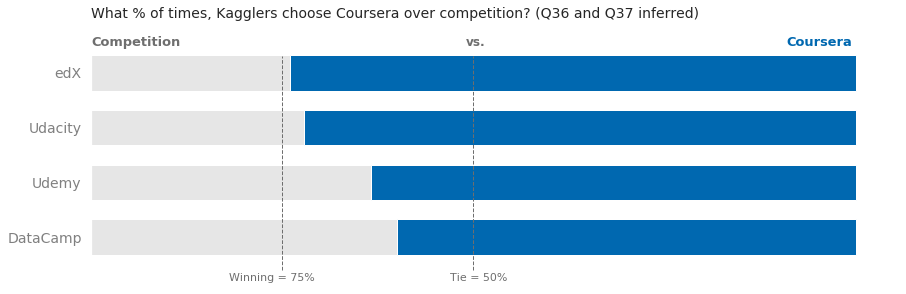

In [7]:
# Select appropriate slices of respondents: those who used at least 2 platforms of interest
coursera = []
coursera.append(dat[(dat['Q36_Part_2'] == 'Coursera') & (dat['Q36_Part_4'] == 'DataCamp')]['Q37'].value_counts()[0])
coursera.append(dat[(dat['Q36_Part_2'] == 'Coursera') & (dat['Q36_Part_9'] == 'Udemy')]['Q37'].value_counts()[0])
coursera.append(dat[(dat['Q36_Part_2'] == 'Coursera') & (dat['Q36_Part_1'] == 'Udacity')]['Q37'].value_counts()[0])
coursera.append(dat[(dat['Q36_Part_2'] == 'Coursera') & (dat['Q36_Part_3'] == 'edX')]['Q37'].value_counts()[0])

competition = []
competition.append(dat[(dat['Q36_Part_2'] == 'Coursera') & (dat['Q36_Part_4'] == 'DataCamp')]['Q37'].value_counts()[1])
competition.append(dat[(dat['Q36_Part_2'] == 'Coursera') & (dat['Q36_Part_9'] == 'Udemy')]['Q37'].value_counts()[1])
competition.append(dat[(dat['Q36_Part_2'] == 'Coursera') & (dat['Q36_Part_1'] == 'Udacity')]['Q37'].value_counts()[1])
competition.append(dat[(dat['Q36_Part_2'] == 'Coursera') & (dat['Q36_Part_3'] == 'edX')]['Q37'].value_counts()[1])

# Format data for plotting
plt_data = pd.DataFrame({'Coursera': coursera, 'Competition': competition})
plt_data = (plt_data.transpose()/plt_data.sum(axis=1)).transpose()

competition_labels = ['DataCamp', 'Udemy', 'Udacity', 'edX']

fig, ax = plt.subplots(figsize=(12,4))
plt.tight_layout()
ax.get_xaxis().set_visible(False)
ax.set_facecolor('white')

plt.barh(width = plt_data['Competition'], y=competition_labels, color = '#E6E6E6', height=0.65)
plt.barh(width = plt_data['Coursera'], left=plt_data['Competition'], y=competition_labels, height=0.65, color='#0068B0')

# Add line markers
plt.plot([0.5, 0.5], [-0.6, 3.3], color='#6E6E6E', linestyle='--', linewidth=1)
plt.plot([0.25, 0.25], [-0.6, 3.3], color='#6E6E6E', linestyle='--', linewidth=1)

# Add text labels
plt.text(0, 4, 'What % of times, Kagglers choose Coursera over competition? (Q36 and Q37 inferred)', fontsize=14)
plt.text(0.91, 3.5, 'Coursera', color='#0068B0', fontsize=13, fontweight='bold')
plt.text(0, 3.5, 'Competition', color='#6E6E6E', fontsize=13, fontweight='bold')
plt.text(0.49, 3.5, 'vs.', color='#6E6E6E', fontsize=12, fontweight='bold')
plt.text(0.47, -0.8, 'Tie = 50%', color='#6E6E6E', fontsize=11)
plt.text(0.18, -0.8, 'Winning = 75%', color='#6E6E6E', fontsize=11);

ax.tick_params(axis='y', colors='grey', labelsize=14)

Second most popular MOOC platform, DataCamp, is on much shakier ground compared to its competition. Less than 60% of respondents choose it over edX and Udacity, and slightly over 60% when compared to Udemy. Kaggle's very own learning platform, <span style="background-color: #EFFBEF; height: 50%;">Kaggle Learn, is equally preferred to DataCamp</span>, which is not something that's apparent from the simple count plot above.

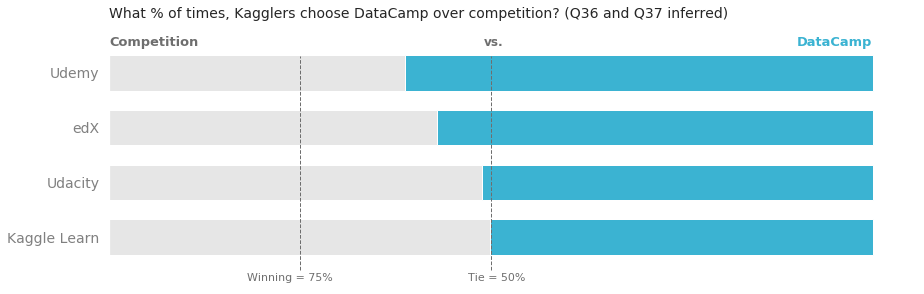

In [8]:
# Select appropriate slices of respondents: those who used at least 2 platforms of interest
datacamp = []
datacamp.append(dat[(dat['Q36_Part_4'] == 'DataCamp') & (dat['Q36_Part_6'] == 'Kaggle Learn')]['Q37'].value_counts()[0])
datacamp.append(dat[(dat['Q36_Part_4'] == 'DataCamp') & (dat['Q36_Part_9'] == 'Udemy')]['Q37'].value_counts()[0])
datacamp.append(dat[(dat['Q36_Part_4'] == 'DataCamp') & (dat['Q36_Part_3'] == 'edX')]['Q37'].value_counts()[0])
datacamp.append(dat[(dat['Q36_Part_4'] == 'DataCamp') & (dat['Q36_Part_1'] == 'Udacity')]['Q37'].value_counts()[0])

competition = []
competition.append(dat[(dat['Q36_Part_4'] == 'DataCamp') & (dat['Q36_Part_6'] == 'Kaggle Learn')]['Q37'].value_counts()[1])
competition.append(dat[(dat['Q36_Part_4'] == 'DataCamp') & (dat['Q36_Part_9'] == 'Udemy')]['Q37'].value_counts()[1])
competition.append(dat[(dat['Q36_Part_4'] == 'DataCamp') & (dat['Q36_Part_3'] == 'edX')]['Q37'].value_counts()[1])
competition.append(dat[(dat['Q36_Part_4'] == 'DataCamp') & (dat['Q36_Part_1'] == 'Udacity')]['Q37'].value_counts()[1])

# Format data for plotting
plt_data = pd.DataFrame({'DataCamp': datacamp, 'Competition': competition})
plt_data = (plt_data.transpose()/plt_data.sum(axis=1)).transpose()

competition_labels = ['Kaggle Learn', 'Udacity', 'edX', 'Udemy']

fig, ax = plt.subplots(figsize=(12,4))
plt.tight_layout()
ax.get_xaxis().set_visible(False)
ax.set_facecolor('white')

plt.barh(width = plt_data['Competition'], y=competition_labels, color = '#E6E6E6', height=0.65)
plt.barh(width = plt_data['DataCamp'], left=plt_data['Competition'], y=competition_labels, height=0.65, color='#3BB3D2')

# Add line markers
plt.plot([0.5, 0.5], [-0.6, 3.3], color='#6E6E6E', linestyle='--', linewidth=1)
plt.plot([0.25, 0.25], [-0.6, 3.3], color='#6E6E6E', linestyle='--', linewidth=1)

# Add text labels
plt.text(0, 4, 'What % of times, Kagglers choose DataCamp over competition? (Q36 and Q37 inferred)', fontsize=14)
plt.text(0.9, 3.5, 'DataCamp', color='#3BB3D2', fontsize=13, fontweight='bold')
plt.text(0, 3.5, 'Competition', color='#6E6E6E', fontsize=13, fontweight='bold')
plt.text(0.49, 3.5, 'vs.', color='#6E6E6E', fontsize=12, fontweight='bold')
plt.text(0.47, -0.8, 'Tie = 50%', color='#6E6E6E', fontsize=11)
plt.text(0.18, -0.8, 'Winning = 75%', color='#6E6E6E', fontsize=11);

ax.tick_params(axis='y', colors='grey', labelsize=14)

## What's next for MOOCs?
MOOCs have been around long enough to become established enterprises. In 2018, Forbes estimates that Coursera's revenue alone is close to $140 millionn USD[5]. With the company rumoured to go public, <span style="background-color: #EFFBEF; height: 50%;">we will see an increased drive for growth from Coursera and its competitors</span> [6]. This growth will be <span style="background-color: #EFFBEF; height: 50%;">fueled by evergrowing demand in the emerging markets</span> such as India and China, where access to higher education is more limited, as the demand for data science professionals steadily grows. While MOOCs are fighting for Kaggler's mindshare, we should ponder why we do online learning: is it to get an extra notch on our professional belt or is it for the sake of self-development? Answer to that question will help you decide if engaging with any of these learning platforms makes sense for you.

For myself, I go to MOOCs for one of two reasons: either out of interest in the subject area or to do a crash course in a technology for the purpose of passing a standardized certification exam. While I'm learning the subject I don't care so much about measurable outcome and while studying for a certification exam, I know the certificate (external to MOOC) is backed by a recognized institution. Online learning works for me in these scenarios, but I'm sure you can find many more uses for it.

<br><br><br>
## Appendix: Other Learning Platforms
Aside from the learning platforms that were offered as multiple choice question in the survey, the respondents had an option to select "Other" and provide their own answer. Looking at these, I realize that I haven't heard about most of them. Of course, the brand names of Linkedin, YouTube, and Codecademy I'm familiar with, but <span style="background-color: #EFFBEF; height: 50%;">stepik, pluralsight, nptel - this is the first I've heard of these</span>. Even as I tried to Google the resources there were some curious results. For exapmle, with [edureka](www.edureka.co) the second search result on Google was "Do you mean Udemy?". It was a clever ad by the more famous MOOC platform. When I went to see what [cognitive class ai](cognitiveclass.ai) is all about, there is an obvious banner ad at the top of the landing page directing me to take a Coursera IBM certification. Finally, [mlcourse.ai](mlcourse.ai) is just an offshoot of [ods.ai](ods.ai), a Russia-based Data Science community.  What's clear is the "Other" MOOC platforms are mostly smaller, nieche players that attract only a small fraction of Kagglers to their sites. In the next year's survey I would like Kaggle to include some of the heavyweights in the multiple choice, namely Linkedin and Codecademy, while TheSchool.AI and DataQuest can be left for "Other" category to be filled out by those who use them.

_Random fact_: more people spell Code**a**cademy (with an "a") rather than the actual name Codecademy. I wonder why they chose to drop the "a" in their brand. 

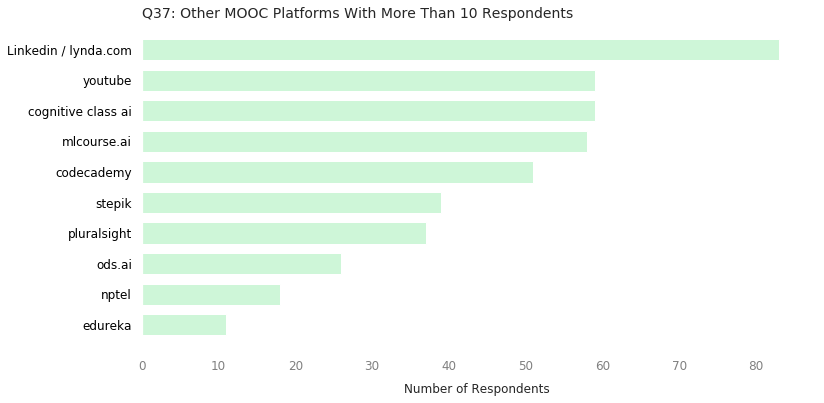

In [9]:
# Read in the data
txt_dat = pd.read_csv('../input/freeFormResponses.csv', dtype='object')

# Group platforms that appear under different names and/or are misspelled
def txt_process(txt):
    if 'linkedin' in txt or 'lynda' in txt or 'linda' in txt or 'lybda' in txt:
        return 'Linkedin / lynda.com'
    elif 'codeacademy' in txt or 'codecademy' in txt or 'code academy' in txt:
        return 'codecademy'
    elif 'cognitive' in txt:
        return 'cognitive class ai'
    elif 'mlcourse' in txt:
        return 'mlcourse.ai'
    elif 'stepic' in txt or 'stepik' in txt:
        return 'stepik'
    elif 'nptel' in txt:
        return 'nptel'
    elif 'vidhya' in txt:
        return 'analytics vidhya'
    elif 'ods' in txt:
        return 'ods.ai'
    elif 'pluralsight' in txt:
        return 'pluralsight'
    else:
        return txt

# Process free text for question 36
txt_dat['Q36_OTHER_TEXT'] = txt_dat['Q36_OTHER_TEXT'].dropna().apply(lambda x: x.lower().strip())
txt_dat['Q36_OTHER_TEXT'] = txt_dat['Q36_OTHER_TEXT'].dropna().apply(txt_process)

# Plot

# Basic plot setting
fig, ax = plt.subplots(figsize=(12,6))
ax.set_facecolor('white')
plt.title('Q37: Other MOOC Platforms With More Than 10 Respondents', fontsize=14, loc='left')

# Horizontal bars
plt.barh(width=txt_dat['Q36_OTHER_TEXT'].value_counts()[:10], y=txt_dat['Q36_OTHER_TEXT'].value_counts()[:10].index, height=0.7, color='#CEF6D8');

# X-axis formatting
plt.xlabel('Number of Respondents', labelpad = 10)
ax.tick_params(axis='x', colors='grey', labelsize=12)

# Y-axis formatting
ax.yaxis.grid(False)
ax.tick_params(axis='y', colors='black', labelsize=12)

# Fix the order to be highest to lowest
plt.gca().invert_yaxis();

## References
[1] [_Udacity U-Turns on Money Back Guarantee_](https://www.insidehighered.com/news/2018/03/16/udacity-ends-pledge-students-get-hired-or-get-their-money-back). Insider Higher Ed. March 16, 2018.<br>
[2]  [_Will MOOCs be Flukes?_](https://www.newyorker.com/science/maria-konnikova/moocs-failure-solutions). The New Yorker. November 7, 2014.<br>
[3] [_The Future of Massively Open Online Courses_](https://www.forbes.com/sites/quora/2017/03/23/the-future-of-massively-open-online-courses-moocs/#4f7289046b83). Forbes. March 23, 2017.<br>
[4] [_India Loves MOOCs_](https://www.technologyreview.com/s/539131/india-loves-moocs/). MIT Technology Review. July 26, 2015. <br>
[5] [_This Company Could Be Your Next Teacher: Coursera Plots A Massive Future For Online Education_](https://www.forbes.com/sites/susanadams/2018/10/16/this-company-could-be-your-next-teacher-coursera-plots-a-massive-future-for-online-education/#2e348b5e2a39). Forbes. October 16, 2018.<br>
[6] [_Beware of the Great MOOC Bait-and-Switch_](https://www.forbes.com/sites/dereknewton/2018/11/19/beware-of-the-great-mooc-bait-and-switch/#7f3bce8b12f2). Forbes. November 19, 2018.